In [1]:
import pandas as pd
!pip install fsspec
!pip install gcsfs 
 
 
df = pd.read_csv('gs://capstoragebucket2020/All_joined_v3.csv')

     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 1.3MB 11.1MB/s 
     |████████████████████████████████| 296kB 30.5MB/s 
     |████████████████████████████████| 143kB 40.6MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=c9b42e3d5667831419b2784f1fbc21b40eae96f68af534d06a2eaac69c93e7b8
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [2]:
df.tail()

,latitude,longitude,month,year,INCENDIE_count,ALARMES_INCENDIES_count,total_crimes,vols_count,Mefait_count,Vol_de_vehicule_count,Introduction_count,Vol_moteur_count,Infractions_entrainant_count,caserne_count,sum_etage_hors_sol,sum_nombre_logement,min_annee_construction,max_annee_construction,avg_annee_construction,sum_superficie_terrain,sum_superficie_batiment,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers
30826,45.67,-73.52,4,2015,0,0,1,0,0,0,1,0,0,0,85,83,1950,2007,1975.471429,44515,8443,5.56117,1626,590,586,2.7,35.6,3.1,515
30827,45.67,-73.52,5,2017,0,1,0,0,0,0,0,0,0,0,85,83,1950,2007,1975.471429,44515,8443,5.56117,1626,590,586,2.7,35.6,3.1,515
30828,45.67,-73.52,10,2017,0,0,1,0,0,0,1,0,0,0,85,83,1950,2007,1975.471429,44515,8443,5.56117,1626,590,586,2.7,35.6,3.1,515
30829,45.67,-73.52,1,2015,0,0,1,0,0,0,1,0,0,0,85,83,1950,2007,1975.471429,44515,8443,5.56117,1626,590,586,2.7,35.6,3.1,515
30830,45.67,-73.52,9,2016,0,0,1,0,0,1,0,0,0,0,85,83,1950,2007,1975.471429,44515,8443,5.56117,1626,590,586,2.7,35.6,3.1,515


In [3]:
df=df.sort_values(by=['year', 'month','latitude','longitude'])

In [4]:
df['INCENDIE_count'].value_counts()

0    25197
1     4700
2      766
3      132
4       26
5        7
6        2
7        1
Name: INCENDIE_count, dtype: int64

In [5]:
df.describe()

,latitude,longitude,month,year,INCENDIE_count,ALARMES_INCENDIES_count,total_crimes,vols_count,Mefait_count,Vol_de_vehicule_count,Introduction_count,Vol_moteur_count,Infractions_entrainant_count,caserne_count,sum_etage_hors_sol,sum_nombre_logement,min_annee_construction,max_annee_construction,avg_annee_construction,sum_superficie_terrain,sum_superficie_batiment,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers
count,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,3.083100e+04,3.083100e+04,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000,30831.000000
mean,45.521970,-73.658733,6.381337,2017.410528,0.220103,2.420097,4.644806,0.257565,1.044922,0.658493,1.463722,1.216211,0.003892,0.136745,1539.794395,2040.343518,1901.375466,2015.383218,1969.911896,4.327656e+05,6.085602e+05,1.432269,717.436671,322.750997,300.405112,2.308420,40.432526,2.829380,176.204470
std,0.066063,0.108458,3.383709,1.673232,0.514795,3.281905,5.677108,0.696306,1.687976,1.053534,2.413869,2.156997,0.064317,0.343584,1131.674422,1830.101362,60.197334,6.233986,17.411541,1.577753e+05,2.144041e+06,3.111724,487.278783,256.492223,219.826818,0.628306,9.998705,0.594489,147.235356
min,45.400000,-73.960000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,1900.000000,1900.000000,1.243000e+03,1.090000e+02,0.019040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.470000,-73.720000,3.000000,2016.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,728.000000,671.000000,1880.000000,2014.000000,1959.731745,3.509970e+05,1.321060e+05,0.082370,495.000000,200.000000,191.000000,2.000000,37.800000,2.700000,105.000000
50%,45.510000,-73.630000,6.000000,2017.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1432.000000,1486.000000,1910.000000,2018.000000,1969.912360,4.537330e+05,2.389450e+05,0.185670,586.000000,263.000000,243.000000,2.300000,40.400000,2.900000,145.000000
75%,45.570000,-73.580000,9.000000,2019.000000,0.000000,3.000000,6.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2167.000000,3107.000000,1950.000000,2019.000000,1981.980392,5.232220e+05,4.541680e+05,0.871770,785.000000,362.000000,341.000000,2.700000,43.200000,3.100000,205.000000
max,45.700000,-73.480000,12.000000,2020.000000,7.000000,45.000000,63.000000,12.000000,26.000000,39.000000,30.000000,35.000000,2.000000,1.000000,5764.000000,11100.000000,1996.000000,2020.000000,2012.215104,3.790377e+06,4.144732e+07,15.997840,4669.000000,2596.000000,2111.000000,3.700000,91.600000,3.900000,1270.000000


In [6]:
corr_matrix = df.corr()

In [7]:
corr_matrix["INCENDIE_count"].sort_values(ascending=False)

INCENDIE_count                  1.000000
sum_nombre_logement             0.345779
sum_etage_hors_sol              0.296308
total_crimes                    0.282805
ALARMES_INCENDIES_count         0.277268
Introduction_count              0.249569
Mefait_count                    0.237519
Vol_moteur_count                0.186271
vols_count                      0.180177
longitude                       0.140413
caserne_count                   0.109855
sum_superficie_batiment         0.083279
max_annee_construction          0.077627
Vol_de_vehicule_count           0.069761
dwellings                       0.055430
households                      0.035212
sum_superficie_terrain          0.031230
Infractions_entrainant_count    0.022128
latitude                        0.019402
year                            0.014955
month                          -0.010032
population                     -0.023563
averageage                     -0.029906
workers                        -0.039661
averagesizeofcen

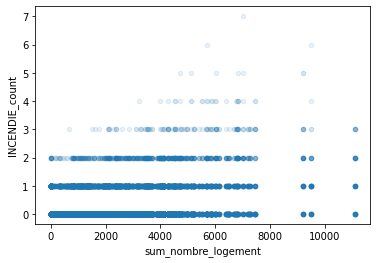

In [8]:
df.plot(kind="scatter", x="sum_nombre_logement", y="INCENDIE_count",
             alpha=0.1)


In [9]:
train_set=df[df['year'] < 2019]
test_set =df[df['year'] == 2019]

In [10]:
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

len(train_set),len(test_set)

(21306, 5252)

In [11]:
train_set_n = train_set.drop("INCENDIE_count", axis=1)

In [12]:
train_labels = train_set["INCENDIE_count"].copy()

In [13]:
train_set_n.head()

,latitude,longitude,month,year,ALARMES_INCENDIES_count,total_crimes,vols_count,Mefait_count,Vol_de_vehicule_count,Introduction_count,Vol_moteur_count,Infractions_entrainant_count,caserne_count,sum_etage_hors_sol,sum_nombre_logement,min_annee_construction,max_annee_construction,avg_annee_construction,sum_superficie_terrain,sum_superficie_batiment,area,population,dwellings,households,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers
3181,45.41,-73.93,1,2015,0,1,0,0,0,1,0,0,0,385,268,1904,2019,1958.563433,427074,46210,3.05951,633,249,241,2.6,44.8,3.0,150
30561,45.42,-73.93,1,2015,1,0,0,0,0,0,0,0,0,116,51,1870,2019,2003.566667,424570,82010,3.05951,633,249,241,2.6,44.8,3.0,150
30280,45.42,-73.92,1,2015,2,2,0,0,0,2,0,0,0,150,190,1945,2017,1983.956204,470746,96326,3.05951,633,249,241,2.6,44.8,3.0,150
30069,45.42,-73.91,1,2015,2,0,0,0,0,0,0,0,1,352,204,1898,2019,1974.627907,631101,71370,0.32593,430,144,141,3.0,42.4,3.1,120
30165,45.42,-73.89,1,2015,1,0,0,0,0,0,0,0,0,835,592,1885,2019,1959.239057,645963,96281,0.26120,504,180,173,3.0,41.1,3.1,110


In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_n, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lin_reg.coef_

array([ 1.16058569e-01, -1.03117933e-01, -5.73247414e-04,  1.58180439e-03,
        1.19590132e-02,  1.59923359e-02, -2.87872515e-03, -5.53653859e-03,
       -2.19643187e-02, -7.73078440e-03, -1.73770136e-02,  7.14797164e-02,
        1.70985458e-02, -1.56399831e-05,  7.56604216e-05,  7.75435758e-05,
        5.08483458e-04, -6.95243029e-04, -4.34113860e-08,  3.51279321e-10,
        6.88915922e-04,  9.94571226e-05,  1.32504591e-04, -2.55399544e-04,
       -4.25421970e-02, -2.43810026e-03,  5.18964321e-02, -1.95868793e-04])

In [16]:
print(lin_reg.score(train_set_n,train_labels))

0.13162503990986985


In [17]:
test_set_n = test_set.drop("INCENDIE_count", axis=1)
test_labels= test_set["INCENDIE_count"].copy()
print(lin_reg.score(test_set_n,test_labels))

0.13883589279289754


In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set_n, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_predictions = tree_reg.predict(train_set_n)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_set_n, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [21]:
print(forest_reg.score(test_set_n,test_labels))

0.07880468777546246


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_set_n, train_labels)
train_predictions = svm_reg.predict(train_set_n)
svm_mse = mean_squared_error(train_labels, train_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse